## Импорт необходимых библиотек

In [12]:
from scipy.stats import norm, rayleigh
from viewtoolbox import *

# Для корректного отображения графика функции от двух переменных:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

## Моделирование случайной величины с произвольным законом распределения

### Исходные параметры (константы)

$ \bullet $ Число опытов со случайным исходом $ - $ N_VALUES; 

$ \bullet $ Число точек для построения графиков $ - $ N_EDGES.

In [13]:
N_VALUES = 5000 # число опытов со случайным исходом
N_EDGES = 200   # число точек для построения графиков

### Формирование случайных величин, распределенных по нормальному закону распределения

Плотность вероятности СВ, распределенной по нормальному закону распределения, имеет следующий вид:
$$w(x) = \frac{1}{\sqrt{2\pi}\sigma} \cdot e^{-\frac{(x - m)^2}{2\sigma^2}},$$
где $m$ $-$ математическое ожидание; <br>
$\sigma$ $-$ среднеквадратичное отклонение (СКО).

**Параметры распределения:**

In [14]:
mu_param_ex = 2    # математическое ожидание
sigma_param_ex = 3 # СКО

**Формирование СВ с использованием встроенной функции:**

In [15]:
y_lib_ex = np.random.normal(loc=mu_param_ex, scale=sigma_param_ex, size=N_VALUES)    # нормально распределенные СВ

**Формирование СВ на основании равномерно распределенной СВ:**

Как известно, нормально распределённая СВ может быть получена как произведение двух независимых СВ, одна из которых распределена по закону Рэлея, а другая – по закону арксинуса:
$$y = \sigma \cdot y_1 \cdot y_2 + m,$$
где $y_1 = \sqrt{-2 \ln(x_1)}$ $-$ СВ, распределенная по закону Рэлея; <br>
$y_2 = \sin(2 \pi x_2)$ $-$ СВ, распределенная по закону арксинуса; <br>
$x_1$ и $x_2$ $-$ равномерно распределенные СВ.

*Формирование равномерно распределенных СВ:*

In [16]:
# Формирование равномерно распределенных СВ
x_1_ex = np.random.uniform(low=0, high=1, size=N_VALUES)
x_2_ex = np.random.uniform(low=0, high=1, size=N_VALUES)

*Отображение плотности вероятности исходного закона распределения:*

Плотность вероятности равномерно распределенной СВ имеет следующий вид:
$$w(x) = \frac{1}{b-a}, x \in (a, b).$$
Огибающая гистограммы полученных величин должна сходиться к идеальному случаю.

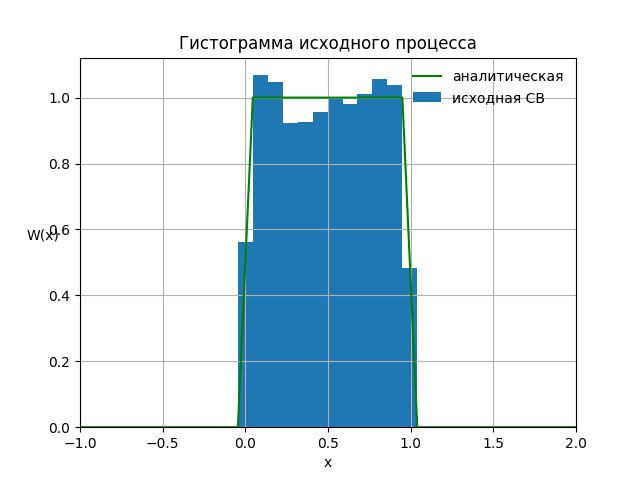

In [17]:
x_axis_ex = np.linspace(-3*sigma_param_ex, 3*sigma_param_ex, N_EDGES)    # интервал значений, на котором задана плотность вероятноси
# Идеальная плотность вероятности исходного закона распределения
wx_analityc_ex = (x_axis_ex>=0) & (x_axis_ex<=1)

plot_distrib_with_analyt(x_1_ex, x_axis_ex, wx_analityc_ex, ['Гистограмма исходного процесса', 'исходная СВ', 'x', (-1, 2)])

*Нелинейное преобразование равномерной СВ:*

In [18]:
y_1 = np.sqrt(-2 * np.log(x_1_ex)) # результат нелинейного преобразования - Рэлеевская СВ
y_2 = np.sin(2*np.pi*x_2_ex)       # результат нелинейного преобразования - Арксинусная СВ

*Графики функций, обеспечивающие нелинейное преобразование:*

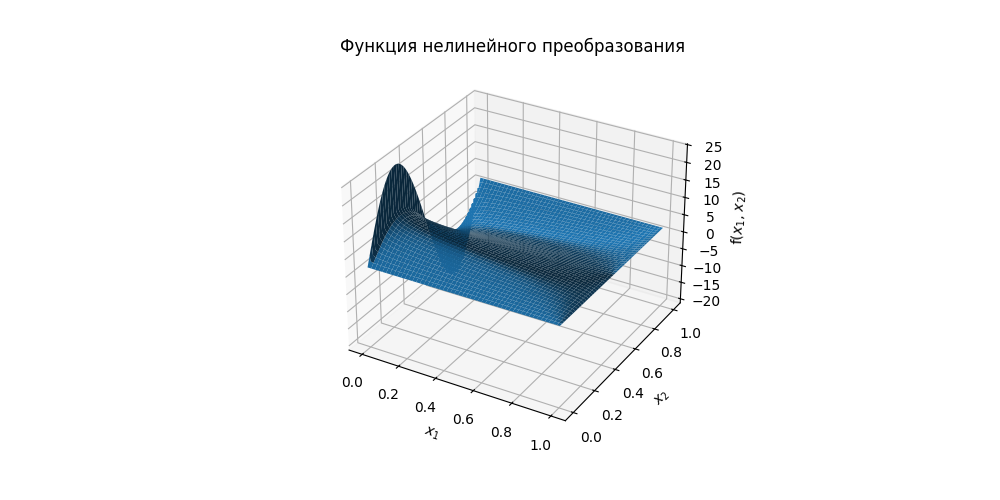

In [19]:
axises_ex = np.linspace(1e-12, 1, N_EDGES)  # значение по осям (достаточно сформировать только один массив,
                                            # т.к. масштаб по обеим осям одинаковый)
f_ex = lambda x_1, x_2: sigma_param_ex * np.sqrt(-2 * np.log(x_1)) * np.sin(2*np.pi*x_2) + mu_param_ex  # функция нелинейного преобразования

plot_3D_func(f_ex, axises_ex, axises_ex)

*Формирование целевого закона распределения:*

In [20]:
y_custom_ex = sigma_param_ex * y_1 * y_2 + mu_param_ex   # СВ, распределенные по нормальному закону распределения

*Отображение плотности вероятности целевого закона распределения:*

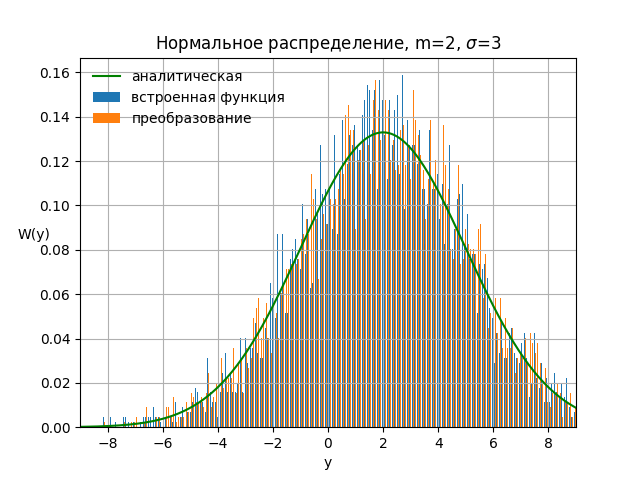

In [21]:
# Аналитическое значение СВ
w_analityc_ex = norm.pdf(x_axis_ex, loc=mu_param_ex, scale=sigma_param_ex)

plot_distrib_with_analyt([y_lib_ex, y_custom_ex], 
                         x_axis_ex, 
                         w_analityc_ex,
                         ['Нормальное распределение, m=' + str(mu_param_ex) + ', $\\sigma$=' + str(sigma_param_ex), 
                          ['встроенная функция', 'преобразование'], 
                          'y'])

### Формирование случайных величин, заданных по варианту

Для формирования СВ необходимо выполнить следующее: 
 
$ \hspace{1cm} \bullet $ Задать необходимые параметры, характеризующие Ваше распределение. 
 
$ \hspace{1cm} \bullet $ Сформировать СВ с использованием встроенной функции. 
 
$ \hspace{1cm} \bullet $ Сформировать СВ с исходным законом распределения. Отобразить на одном графике гистограмму значений с исходным законом распределения и функцию идеальной плотности вероятности (с указанием параметров функции). 
 
$ \hspace{1cm} \bullet $ Построить график функции, обеспечивающей нелинейное преобразование $y=f(x)$ или $y=f(x_1, x_2)$ (кроме случая распределения хи-квадрат). 
 
$ \hspace{1cm} \bullet $ Сформировать СВ с целевым законом распределения (с помощью функции, обеспечивающей нелинейное преобразование). Отобразить на одном графике гистограммы значений, полученных с использованием реализованного алгоритма и встроенной функцией использованного программного пакета, и функцию плотности вероятности целевого закона распределения (с указанием парамеров функции).

Все необходимые функции реализованы в файле viewtoolbolx.py

**Параметры распределения:**

In [22]:
# TODO: задать необходимые параметры распределения

**Формирование СВ с использованием встроенной функции:**

**Формирование СВ на основе исходной СВ:**

*Формирование исходного СВ:*

*Отображение плотности вероятности исходного закона распределения:*

*Графики функций, обеспечивающие нелинейное преобразование:*

*Формирование целевого закона распределения:*

*Отображение плотности вероятности целевого закона распределения:*